## Prueba #0307

### "ANOVA para el crecimiento de los dientes en las cobayas"

In [59]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import os
%matplotlib inline

#### Responda las siguientes preguntas proporcionando código Python:

Utilizar el conjunto de datos "data_ToothGrowth.csv". Los atributos de este dataset son los siguientes:
- len = longitud de los dientes.
- sup = tipo suplementario con dos valores posibles: VC (vitamina C) o OJ (zumo de naranja).
- dosis (mgr / día) = dosis por día con tres valores posibles: 0,5, 1,0, 2,0.

In [60]:
# Ir al directorio que contiene al fichero. 
# os.chdir(r'~~')                # Descomentar y reemplazar
                                 # por la ruta adecuada si el fichero no esta en el mismo directorio.

In [61]:
df = pd.read_csv('data_ToothGrowth.csv', header='infer')

In [62]:
df.head()

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


1) Realice el test ANOVA ($\alpha = 5\%$) con la variable 'supp' para determinar si las varianzas de las longitudes de los dientes entre las categorías son comparables. <br>
Comente el resultado y complete la explicación con un diagrama de cajas.

In [63]:
# Agrupar por categoría.
table1 = df.pivot_table(index = ['supp'], values = ['len'])
table1

,len
supp,
OJ,20.663333
VC,16.963333


In [66]:
# ANOVA
x_oj = df[df.supp == 'OJ'].len
x_oj.mean()
x_vc = df[df.supp == 'VC'].len
x_vc.mean()
st.f_oneway(x_oj, x_vc)

F_onewayResult(statistic=3.668252541070971, pvalue=0.060393371224128745)

#### Comentario del resultado.
como la p > 0.05 se acepta la hipotesis nula, la varianza de la longitud del diente es equivalente en diferentes niveles del método de alimentación de las cobayas.


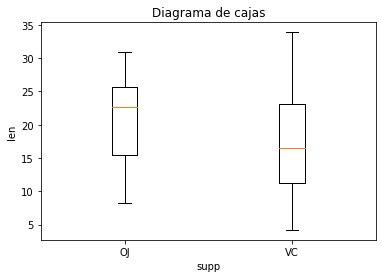

In [67]:
# Diagrama de cajas.
figure = plt.figure()
# creamos lista de los datos a representar 
data= [x_oj, x_vc]
#dibujamos la figura con el combre correspondiente de cada diagrama
fig1 = plt.boxplot(data, labels=['OJ','VC'])
plt.ylabel('len')
plt.xlabel('supp')
plt.title('Diagrama de cajas')

plt.show()

2) Realice el test ANOVA ($\alpha = 5\%$) con la variable 'dose' para determinar si las varianzas de las categorías son comparables. <br>
Comente el resultado y complete la explicación con un diagrama de cajas.

In [68]:
# Agrupar por categoría.
table2 = df.pivot_table(index = ['dose'], values = ['len'])
table2

,len
dose,
0.5,10.605
1.0,19.735
2.0,26.100


In [69]:
# ANOVA.
x = df[df.dose == 0.5].len
x1 = df[df.dose == 1.0].len
x2 = df[df.dose == 2.0].len 
st.f_oneway(x,x1,x2)

F_onewayResult(statistic=67.41573785674247, pvalue=9.532727011699946e-16)

#### Comentario del resultado.
como p < 0.05 no se cumple la hipotesis nula, por lo que l varianza de la longitud de los dientes no es equivalente a diferentes niveles de dosis

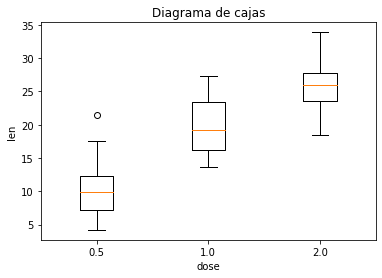

In [72]:
# Diagrama de cajas.
figure2 = plt.figure()
data= [x, x1, x2]
fig1 = plt.boxplot(data, labels=['0.5', '1.0','2.0'])
plt.ylabel('len')
plt.xlabel('dose')
plt.title('Diagrama de cajas')

plt.show()